In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the files
#test = pd.read_csv("D:/Coursera/data/test.csv", index_col=0)
#submission = pd.read_csv("D:/Coursera/data/sample_submission.csv", index_col=0)
#items = pd.read_csv("D:/Coursera/data/items.csv", index_col=1)
#shops = pd.read_csv("D:/Coursera/data/shops.csv", index_col = 1)
#%d.%m.%Y
train = pd.read_csv("D:/Coursera/data/sales_train_v2.csv", parse_dates=[0], dayfirst=True, infer_datetime_format=True, index_col=False)
#sales_train.index.names = ['ID']
#item_categories = pd.read_csv("D:/Coursera/data/item_categories.csv", index_col = 1)

In [3]:
floats = [c for c in train if train[c].dtype == 'float64']
ints = [c for c in train if train[c].dtype == 'int64']
train[floats] = train[floats].astype(np.float32)
train[ints] = train[ints].astype(np.int32)

In [4]:
train['quarter'] = np.int8(pd.DatetimeIndex(train.date).quarter)
train['year'] = np.int32(pd.DatetimeIndex(train.date).year)
train['month'] = np.int8(pd.DatetimeIndex(train.date).month)
train['day'] = np.int8(pd.DatetimeIndex(train.date).day)
train['dayofweek'] = np.int8(pd.DatetimeIndex(train.date).dayofweek)
train['daysinmonth'] = np.int8(pd.DatetimeIndex(train.date).daysinmonth)

In [87]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,quarter,year,month,day,dayofweek,daysinmonth
0,2013-01-02,0,59,22154,999.000000,1.0,1,2013,1,2,2,31
1,2013-01-03,0,25,2552,899.000000,1.0,1,2013,1,3,3,31
2,2013-01-05,0,25,2552,899.000000,-1.0,1,2013,1,5,5,31
3,2013-01-06,0,25,2554,1709.050049,1.0,1,2013,1,6,6,31
4,2013-01-15,0,25,2555,1099.000000,1.0,1,2013,1,15,1,31


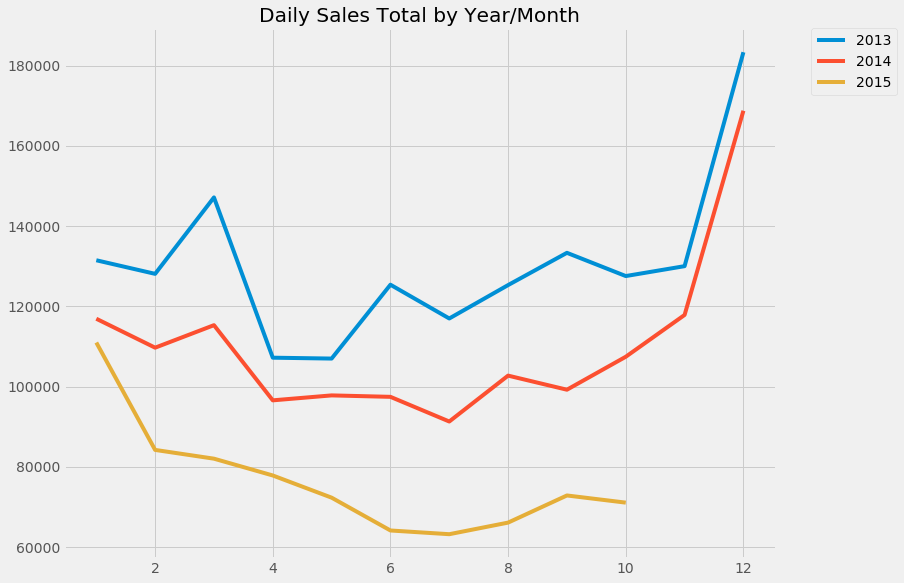

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
plt.subplot(223)
plt.plot(train[(train.year==2013)].groupby([train.month]).agg({'item_cnt_day':'sum'}), label="2013")
plt.plot(train[(train.year==2014)].groupby([train.month]).agg({'item_cnt_day':'sum'}), label="2014")
plt.plot(train[(train.year==2015)].groupby([train.month]).agg({'item_cnt_day':'sum'}), label="2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Daily Sales Total by Year/Month")
plt.show()

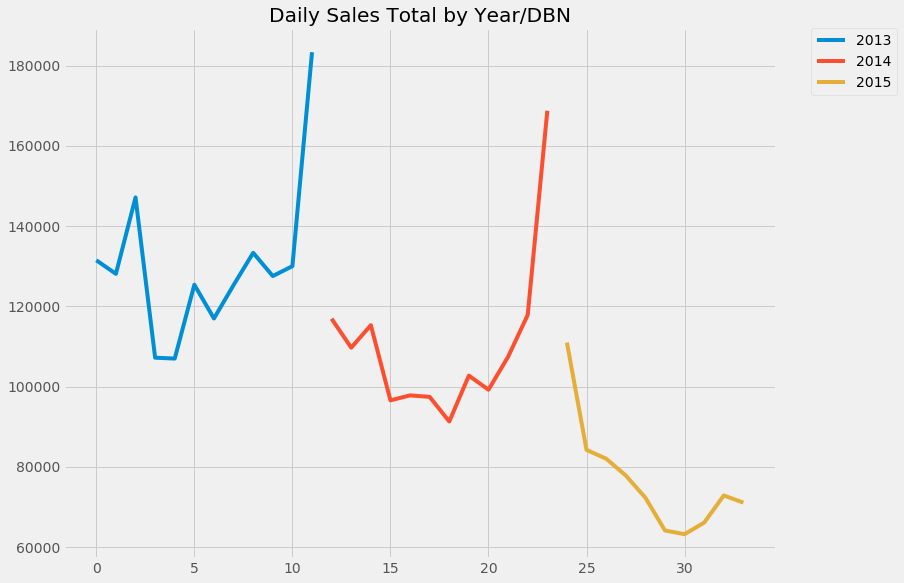

In [62]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
plt.subplot(223)
plt.plot(train[(train.year==2013)].groupby([train.date_block_num]).agg({'item_cnt_day':'sum'}), label="2013")
plt.plot(train[(train.year==2014)].groupby([train.date_block_num]).agg({'item_cnt_day':'sum'}), label="2014")
plt.plot(train[(train.year==2015)].groupby([train.date_block_num]).agg({'item_cnt_day':'sum'}), label="2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Daily Sales Total by Year/DBN")
plt.show()

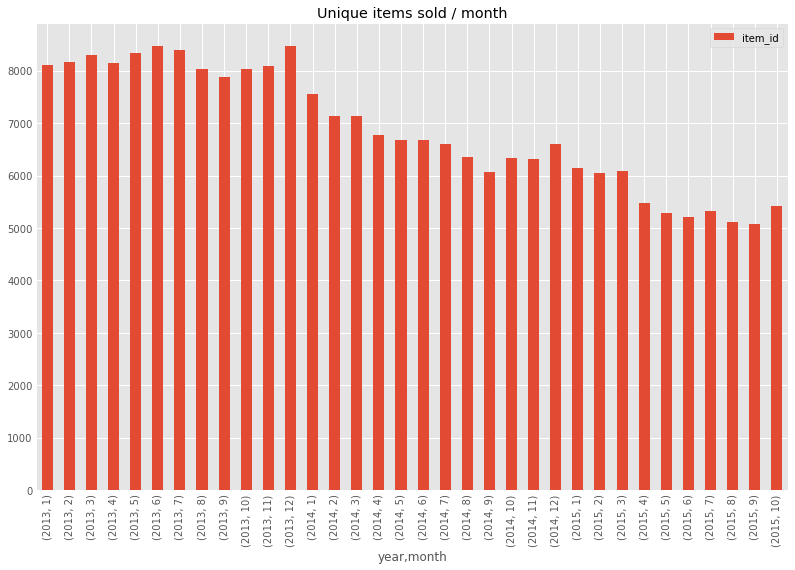

In [79]:
uq_items_mo = train[['year','month','item_id']].drop_duplicates(keep='first')
uq_items_mo = pd.DataFrame(uq_items_mo.groupby(['year','month']).agg({'item_id':'count'}))
uq_items_mo.plot(kind='bar', figsize=(12,8), style='ggplot', title='Unique items sold / month')

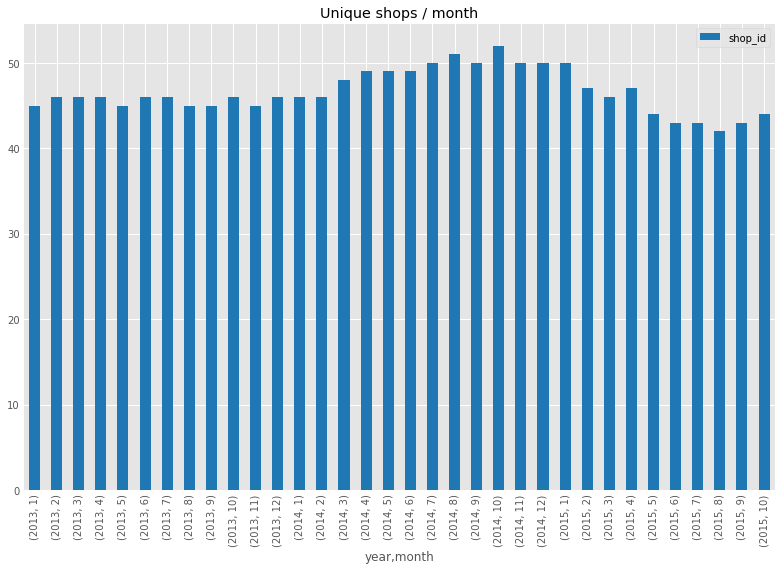

In [85]:
uq_shops_mo = train[['year','month','shop_id']].drop_duplicates(keep='first')
uq_shops_mo = pd.DataFrame(uq_shops_mo.groupby(['year','month']).agg({'shop_id':'count'}))
uq_shops_mo.plot(kind='bar', figsize=(12,8), style='ggplot', title='Unique shops / month', colormap=plt.cm.tab10)

In [107]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,quarter,year,month,day,dayofweek,daysinmonth
0,2013-01-02,0,59,22154,999.000000,1.0,1,2013,1,2,2,31
1,2013-01-03,0,25,2552,899.000000,1.0,1,2013,1,3,3,31
2,2013-01-05,0,25,2552,899.000000,-1.0,1,2013,1,5,5,31
3,2013-01-06,0,25,2554,1709.050049,1.0,1,2013,1,6,6,31
4,2013-01-15,0,25,2555,1099.000000,1.0,1,2013,1,15,1,31


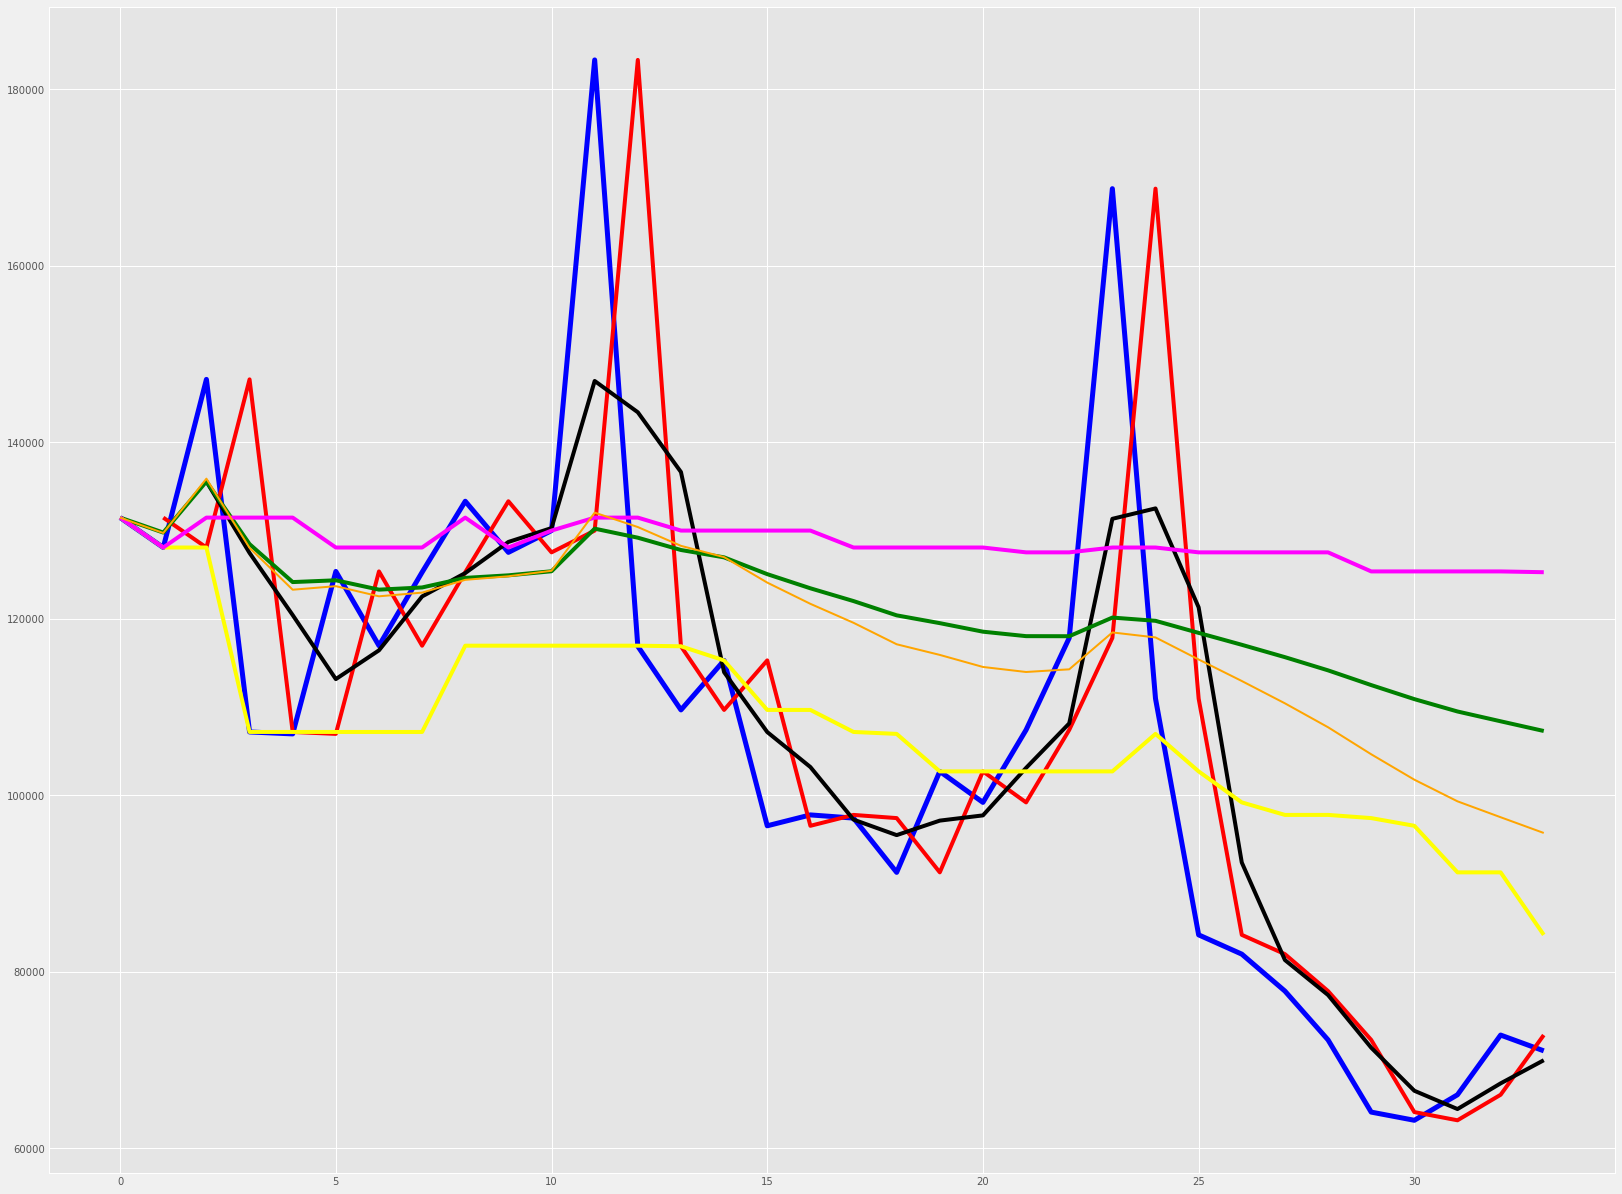

In [213]:
x = train.groupby([train.date_block_num]).agg({'item_cnt_day':'sum'})
y = x.shift(1)
z = x.rolling(window = 3)
ex = x.expanding(min_periods = 1)
ewma = x.ewm(com=16, min_periods=0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))

plt.style.use('ggplot')
plt.plot(x, color='blue', linewidth=5)
plt.plot(y, color='red', label="shifted")
plt.plot(z.mean(), color='black')
plt.plot(ex.mean(), color='green')
plt.plot(ex.quantile(.25), color='yellow')
plt.plot(ex.quantile(.75), color='magenta')
plt.plot(ewma.mean(), color='orange', linewidth=2)
plt.show()

In [215]:
train.head()

,date,shop_id,item_id,date_block_num,item_price,item_cnt_day,quarter,year,month,day,dayofweek,daysinmonth
0,2013-01-02,59,22154,0,999.000000,1.0,1,2013,1,2,2,31
1,2013-01-03,25,2552,0,899.000000,1.0,1,2013,1,3,3,31
2,2013-01-05,25,2552,0,899.000000,-1.0,1,2013,1,5,5,31
3,2013-01-06,25,2554,0,1709.050049,1.0,1,2013,1,6,6,31
4,2013-01-15,25,2555,0,1099.000000,1.0,1,2013,1,15,1,31


In [288]:
train = train.groupby(['date_block_num','year','quarter','month','shop_id','item_id'], as_index=False).agg({'item_cnt_day':'sum'})
train.columns = ['date_block_num','year','quarter','month','shop_id','item_id','item_cnt_month']
train.index.name = 'ID'
train.item_cnt_month = np.clip(train.item_cnt_month, 0, 20)

In [289]:
train.date_block_num = np.int8(train.date_block_num)
train.year = np.int32(train.year)
train.quarter = np.int8(train.quarter)
train.month = np.int8(train.month)
train.shop_id = np.int8(train.shop_id)
train.item_id = np.int32(train.item_id)
train.item_cnt_month = np.float32(train.item_cnt_month)

In [239]:
train.head()

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month
ID,,,,,,,
0,0,2013,1,1,0,32,6.0
1,0,2013,1,1,0,33,3.0
2,0,2013,1,1,0,35,1.0
3,0,2013,1,1,0,43,1.0
4,0,2013,1,1,0,51,2.0


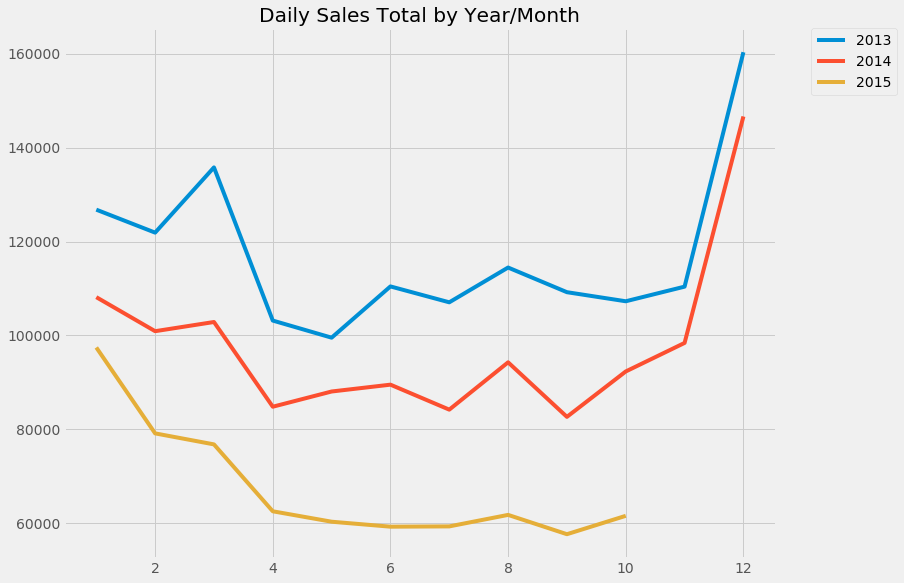

In [240]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
plt.subplot(223)
plt.plot(train[(train.year==2013)].groupby([train.month]).agg({'item_cnt_month':'sum'}), label="2013")
plt.plot(train[(train.year==2014)].groupby([train.month]).agg({'item_cnt_month':'sum'}), label="2014")
plt.plot(train[(train.year==2015)].groupby([train.month]).agg({'item_cnt_month':'sum'}), label="2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Daily Sales Total by Year/Month")
plt.show()

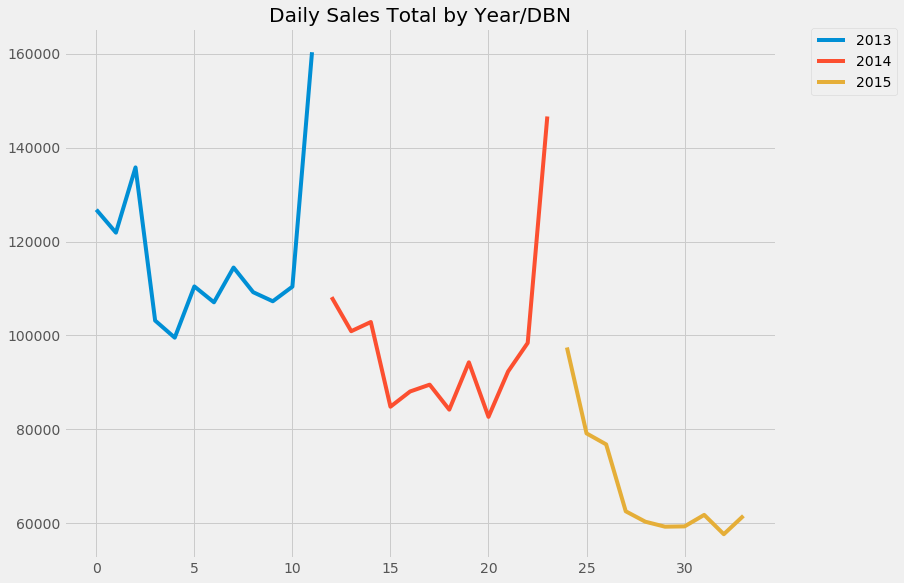

In [241]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
plt.subplot(223)
plt.plot(train[(train.year==2013)].groupby([train.date_block_num]).agg({'item_cnt_month':'sum'}), label="2013")
plt.plot(train[(train.year==2014)].groupby([train.date_block_num]).agg({'item_cnt_month':'sum'}), label="2014")
plt.plot(train[(train.year==2015)].groupby([train.date_block_num]).agg({'item_cnt_month':'sum'}), label="2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Daily Sales Total by Year/DBN")
plt.show()

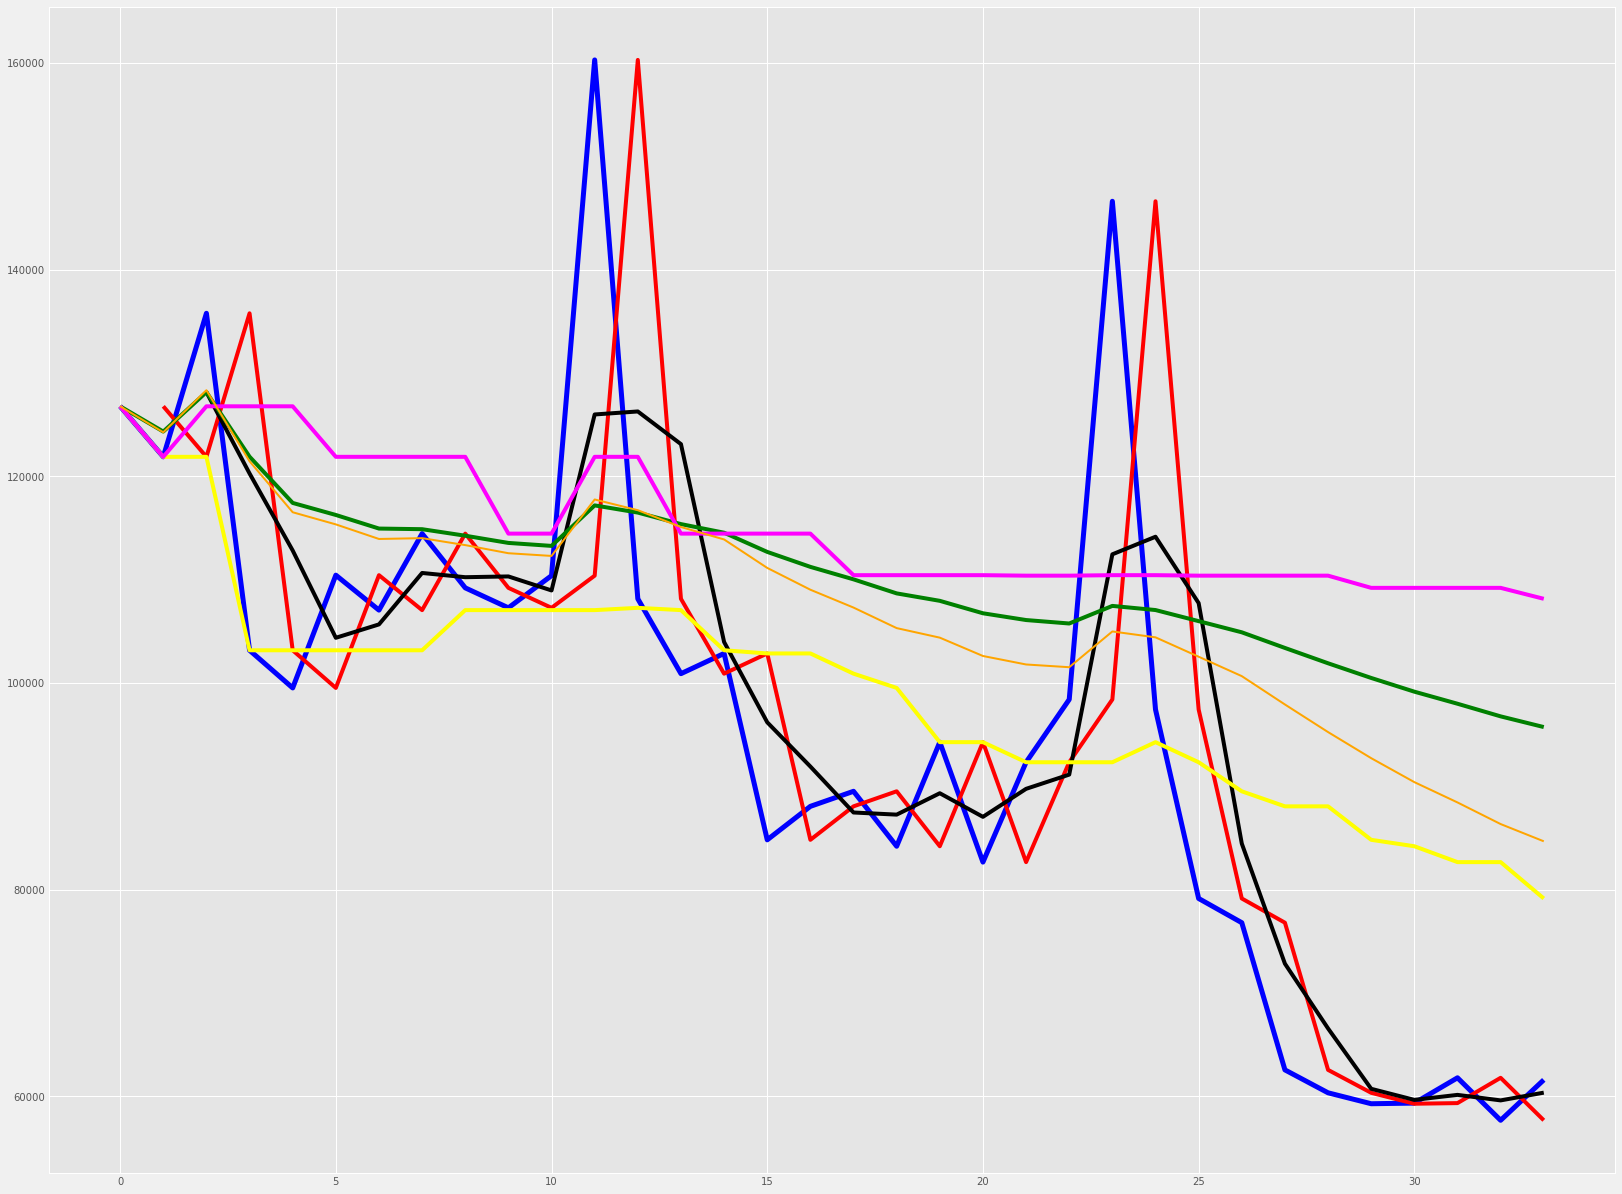

In [242]:
x = train.groupby([train.date_block_num]).agg({'item_cnt_month':'sum'})
y = x.shift(1)
z = x.rolling(window = 3)
ex = x.expanding(min_periods = 1)
ewma = x.ewm(com=16, min_periods=0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))

plt.style.use('ggplot')
plt.plot(x, color='blue', linewidth=5)
plt.plot(y, color='red', label="shifted")
plt.plot(z.mean(), color='black')
plt.plot(ex.mean(), color='green')
plt.plot(ex.quantile(.25), color='yellow')
plt.plot(ex.quantile(.75), color='magenta')
plt.plot(ewma.mean(), color='orange', linewidth=2)
plt.show()

In [292]:
train = train.sort_values(['date_block_num','shop_id','item_id'], ascending=True).reset_index(drop=True)

In [293]:
train['exp_mean_item_cnt_month'] = train.groupby(['shop_id','item_id']).item_cnt_month.transform(lambda x: x.expanding().mean())

In [261]:
train[(train.item_cnt_month != train.exp_mean_item_cnt_month)]

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month
63226,1,2013,1,2,0,32,10.0,8.000000
63228,1,2013,1,2,0,35,14.0,7.500000
63233,1,2013,1,2,0,51,3.0,2.500000
63238,1,2013,1,2,0,98,5.0,12.500000
63243,1,2013,1,2,0,153,2.0,1.500000
63251,1,2013,1,2,0,482,3.0,2.500000
63257,1,2013,1,2,0,556,4.0,6.500000
63260,1,2013,1,2,0,642,4.0,5.000000
63262,1,2013,1,2,0,657,4.0,3.000000
63266,1,2013,1,2,0,715,1.0,2.000000


In [262]:
train[(train.date_block_num <= 33) & (train.shop_id == 59) & (train.item_id == 17279)]

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month
241624,3,2013,2,4,59,17279,1.0,1.000000
351126,5,2013,2,6,59,17279,1.0,1.000000
882653,15,2014,2,4,59,17279,2.0,1.333333
1107550,20,2014,3,9,59,17279,1.0,1.250000
1150142,21,2014,4,10,59,17279,1.0,1.200000
1383798,26,2015,1,3,59,17279,1.0,1.166667
1416677,27,2015,2,4,59,17279,1.0,1.142857
1448919,28,2015,2,5,59,17279,1.0,1.125000
1480804,29,2015,2,6,59,17279,1.0,1.111111
1514334,30,2015,3,7,59,17279,1.0,1.100000


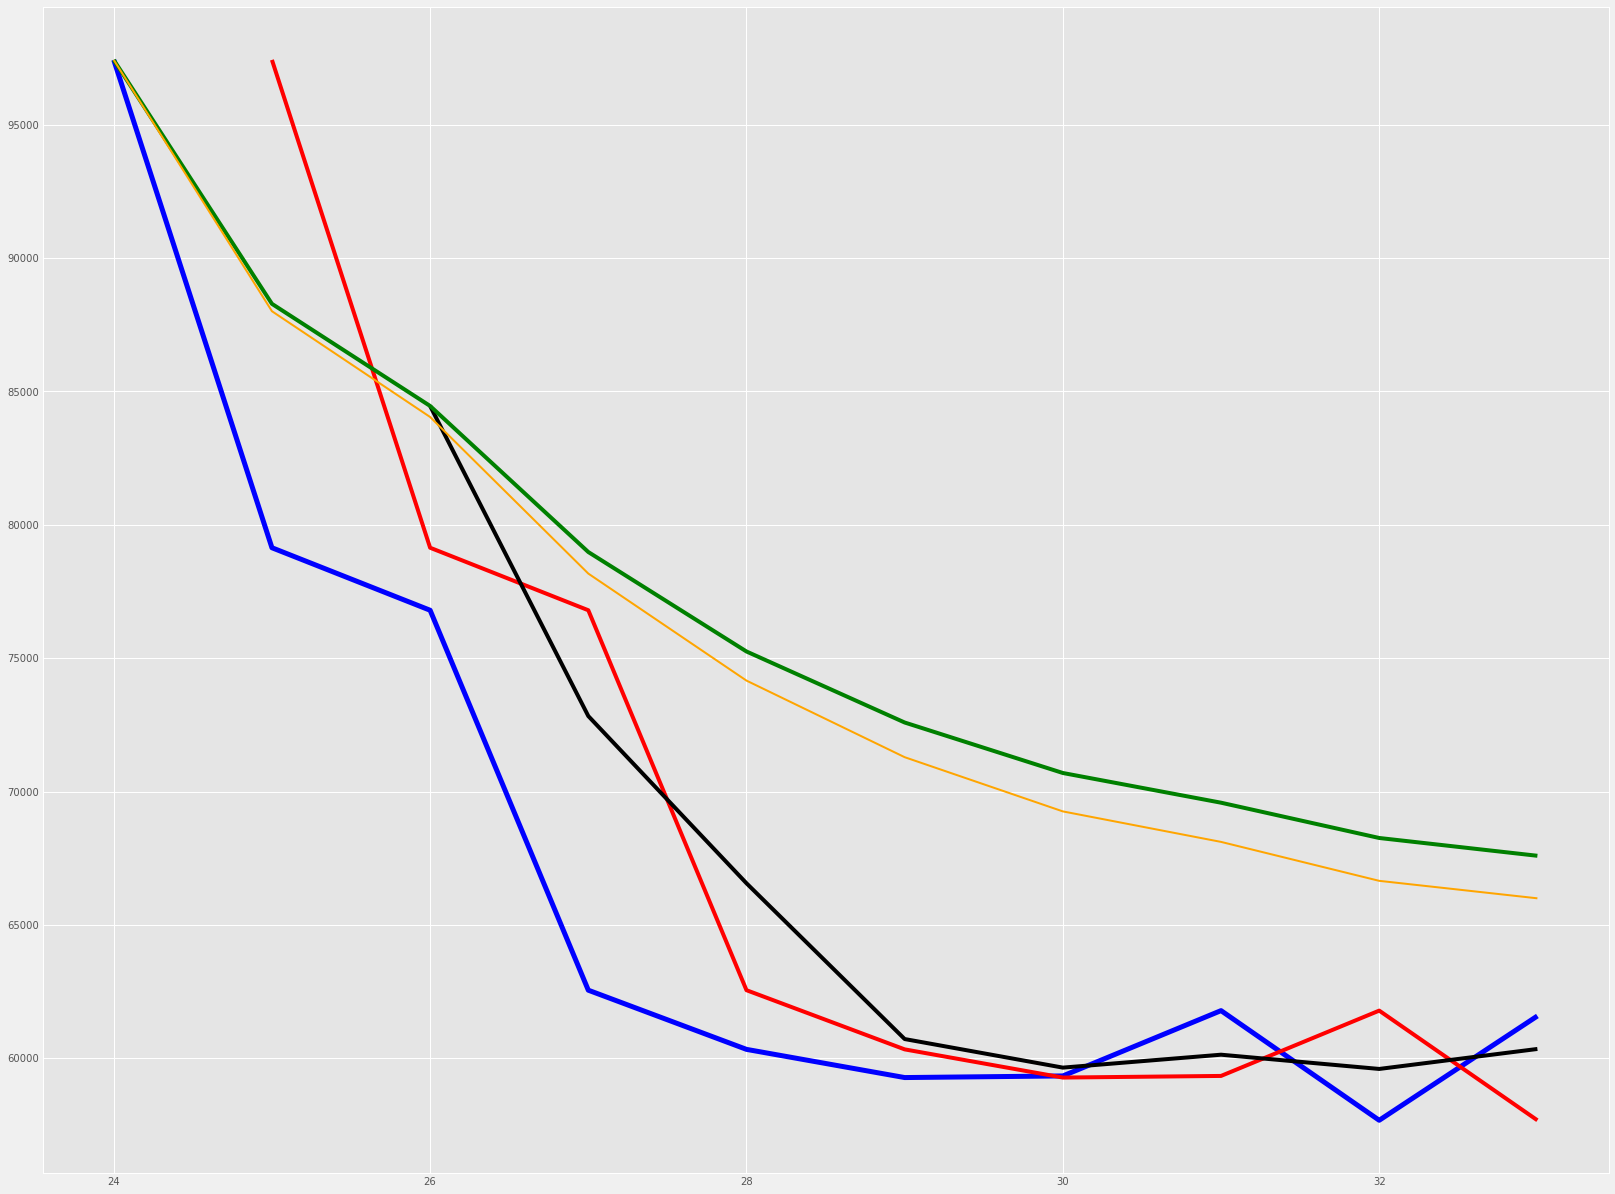

In [266]:
x = train[train.date_block_num >= 24].groupby([train.date_block_num]).agg({'item_cnt_month':'sum'})
y = x.shift(1)
z = x.rolling(window = 3)
ex = x.expanding(min_periods = 1)
ewma = x.ewm(com=16, min_periods=0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))

plt.style.use('ggplot')
plt.plot(x, color='blue', linewidth=5)
plt.plot(y, color='red', label="shifted")
plt.plot(z.mean(), color='black')
plt.plot(ex.mean(), color='green')
#plt.plot(ex.quantile(.25), color='yellow')
#plt.plot(ex.quantile(.75), color='magenta')
plt.plot(ewma.mean(), color='orange', linewidth=2)
plt.show()

In [294]:
train.head()

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month
0,0,2013,1,1,0,32,6.0,6.0
1,0,2013,1,1,0,33,3.0,3.0
2,0,2013,1,1,0,35,1.0,1.0
3,0,2013,1,1,0,43,1.0,1.0
4,0,2013,1,1,0,51,2.0,2.0


In [298]:
shifted_train = train[['date_block_num','shop_id','item_id','item_cnt_month','exp_mean_item_cnt_month']].copy()

In [299]:
shifted_train.date_block_num += 1

In [300]:
shifted_train.columns = ['date_block_num','shop_id','item_id','pps_item_cnt_month_lag_1','pps_exp_mean_item_cnt_month_lag_1']

In [301]:
train = train.merge(shifted_train, on=['date_block_num','shop_id','item_id'], how='left').fillna(0.0)

In [427]:
pd.DataFrame({'real':train[train.date_block_num >= 27].item_cnt_month, 'lagged':train[train.date_block_num >= 27].pps_item_cnt_month_lag_1 }).corr()

,lagged,real
lagged,1.000000,0.506888
real,0.506888,1.000000


In [303]:
pd.DataFrame({'real':train[train.date_block_num >= 27].item_cnt_month, 'lagged':train[train.date_block_num >= 27].pps_exp_mean_item_cnt_month_lag_1 }).corr()

,lagged,real
lagged,1.000000,0.459417
real,0.459417,1.000000


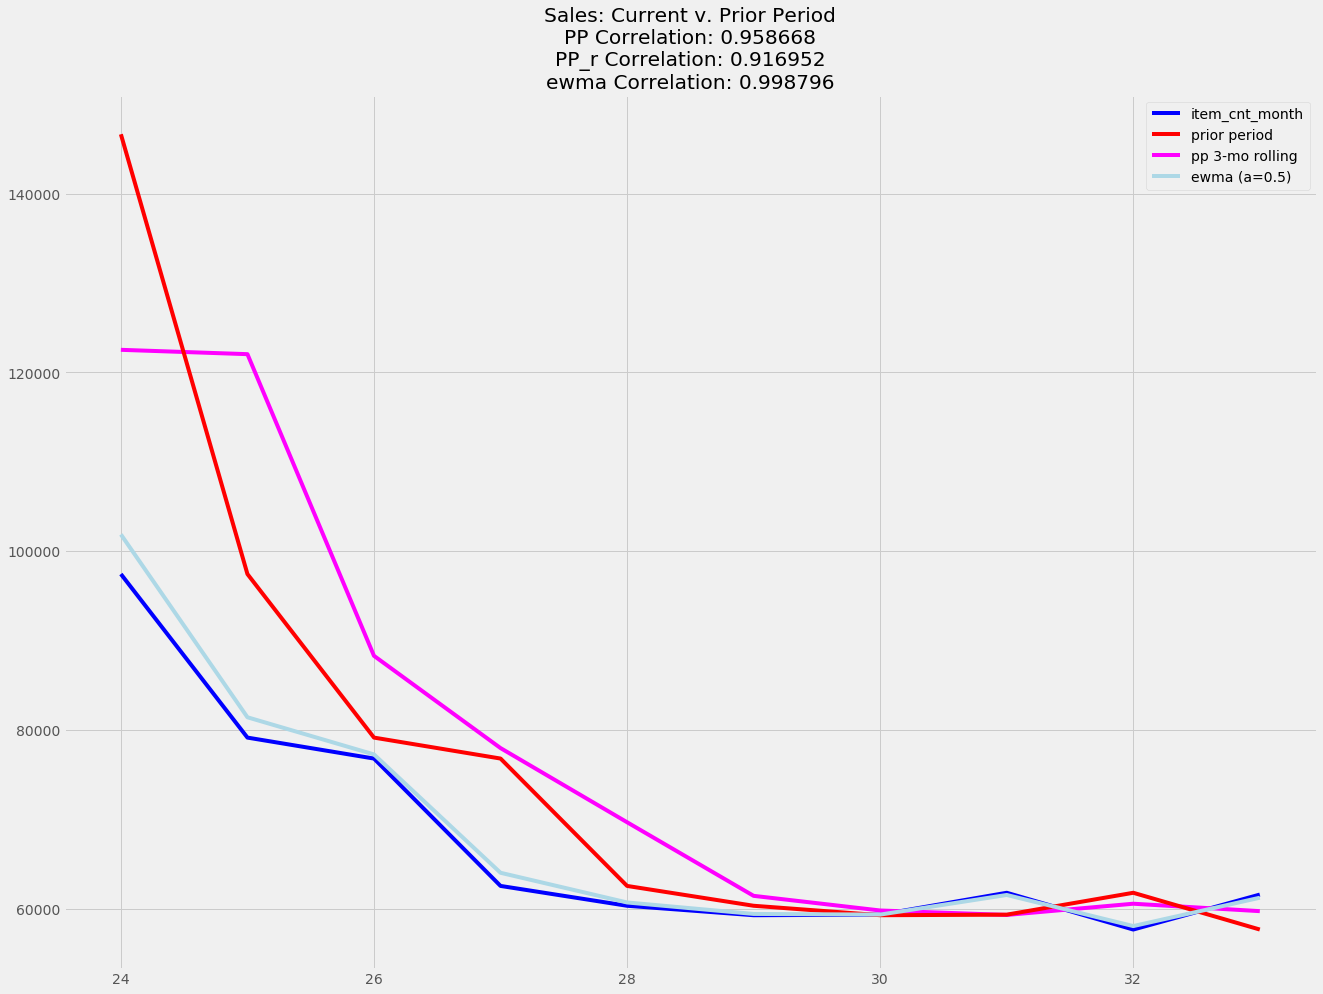

In [574]:
t = train[['date_block_num','item_cnt_month']].copy()
t = pd.DataFrame(t.groupby(['date_block_num']).agg({'item_cnt_month':'sum'}))

pp = t.shift(1)
x = t.shift(12) #* 0.8
y = t.shift(24) #* 0.58
z = pd.concat((x,y),axis=1)
z = z.reset_index()
z = z.set_index('date_block_num')
z = pd.DataFrame(z.mean(axis=1), columns=['item_cnt_month'])
z = z #* 1.0
ppr = pp.rolling(window=2).mean()

zz = pd.concat((x,pp),axis=1)
zz = zz.reset_index()
zz = zz.set_index('date_block_num')
zz.columns = ['pp12', 'pp1']
zz = zz.fillna(0.0)
zz['item_cnt_month'] = zz.pp12 - zz.pp1
zz = zz[['item_cnt_month']]

ewma = t.ewm(alpha=0.9, min_periods=0).mean()

analyze_from_period = 24

#truncate all down to CY2015
t = t[t.index >= analyze_from_period]
pp = pp[pp.index >= analyze_from_period]
x = x[x.index >= analyze_from_period]
y = y[y.index >= analyze_from_period]
z = z[z.index >= analyze_from_period]
zz = zz[zz.index >= analyze_from_period]
ewma = ewma[ewma.index >= analyze_from_period]
ppr = ppr[ppr.index >= analyze_from_period]

cr = pd.DataFrame({'lagged':t.item_cnt_month, 'real':pp.item_cnt_month}).corr()
crppr = pd.DataFrame({'lagged':t.item_cnt_month, 'real':ppr.item_cnt_month}).corr()
crewma = pd.DataFrame({'lagged':t.item_cnt_month, 'real':ewma.item_cnt_month}).corr()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
main, = plt.plot(t.index, t.item_cnt_month, color='blue', label='item_cnt_month')
ppr, = plt.plot(ppr, color='magenta', label='pp 3-mo rolling')
pp, = plt.plot(pp.index, pp.item_cnt_month, color='red', label='prior period')
ew, = plt.plot(ewma.index, ewma.item_cnt_month, color='lightblue', label='ewma (a=0.5)')
#t12, = plt.plot(x.index, x.item_cnt_month, color='orange', label='12 mo. lag')
#t24, = plt.plot(y.index, y.item_cnt_month, color='green', label='24 mo. lag')
#t12_t24, = plt.plot(z.index, z.item_cnt_month, color='magenta', label='mean() of 12 and 24')
#t1_t12, = plt.plot(zz.index, zz.item_cnt_month, color='yellow', label='DIFF 1 to 12')
plt.legend(handles=[main, pp, ppr, ew,])

plt.title('Sales: Current v. Prior Period\nPP Correlation: %f\nPP_r Correlation: %f\newma Correlation: %f' % 
          (cr['lagged']['real'], crppr['lagged']['real'], crewma['lagged']['real']))

In [533]:
train['rw2_mean_item_cnt_month'] = train.groupby(['shop_id','item_id']).item_cnt_month.transform(lambda x: x.rolling(window=2).mean())

In [534]:
train['rw3_mean_item_cnt_month'] = train.groupby(['shop_id','item_id']).item_cnt_month.transform(lambda x: x.rolling(window=3).mean())

In [538]:
train['ewma'] = train.groupby(['shop_id','item_id']).item_cnt_month.transform(lambda x: x.ewm(alpha=0.5, min_periods=0).mean())

In [540]:
train.tail()

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month,pps_item_cnt_month_lag_1,pps_exp_mean_item_cnt_month_lag_1,rw2_mean_item_cnt_month,rw3_mean_item_cnt_month,ewma
1609119,33,2015,4,10,59,22087,6.0,6.424242,3.0,6.437500,4.5,3.666667,4.440322
1609120,33,2015,4,10,59,22088,2.0,6.156250,1.0,6.290323,1.5,3.333333,2.795008
1609121,33,2015,4,10,59,22091,1.0,2.294118,3.0,2.375000,2.0,1.666667,1.791281
1609122,33,2015,4,10,59,22100,1.0,1.000000,1.0,1.000000,1.0,NaN,1.000000
1609123,33,2015,4,10,59,22102,1.0,1.333333,0.0,0.000000,1.5,1.333333,1.285714


In [541]:
train[(train.shop_id == 59) & (train.item_id == 22100)]

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month,pps_item_cnt_month_lag_1,pps_exp_mean_item_cnt_month_lag_1,rw2_mean_item_cnt_month,rw3_mean_item_cnt_month,ewma
1577591,32,2015,3,9,59,22100,1.0,1.0,0.0,0.0,NaN,NaN,1.0
1609122,33,2015,4,10,59,22100,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [544]:
t = train[['date_block_num','item_id','shop_id']].drop_duplicates(keep='first')

In [547]:
t = t.groupby(['item_id','shop_id']).date_block_num.count()

In [562]:
t[t == 34]

item_id  shop_id
32       31         34
464      22         34
482      12         34
         22         34
         25         34
491      22         34
784      22         34
839      12         34
         22         34
1201     31         34
1905     31         34
         52         34
2252     31         34
2308     6          34
         7          34
         15         34
         25         34
         28         34
         31         34
         42         34
         46         34
         47         34
         53         34
2416     52         34
2574     25         34
2808     15         34
3076     38         34
4244     7          34
         28         34
4248     28         34
                    ..
7894     19         34
         25         34
         28         34
         31         34
         38         34
         42         34
         46         34
10331    31         34
11365    12         34
11369    12         34
11370    12         34
11373    12      

In [563]:
train[(train.item_id == 2308) & (train.shop_id == 46)]

,date_block_num,year,quarter,month,shop_id,item_id,item_cnt_month,exp_mean_item_cnt_month,pps_item_cnt_month_lag_1,pps_exp_mean_item_cnt_month_lag_1,rw2_mean_item_cnt_month,rw3_mean_item_cnt_month,ewma
49239,0,2013,1,1,46,2308,20.0,20.000000,0.0,0.000000,NaN,NaN,20.000000
110819,1,2013,1,2,46,2308,15.0,17.500000,20.0,20.000000,17.5,NaN,16.666666
169318,2,2013,1,3,46,2308,14.0,16.333334,15.0,17.500000,14.5,16.333334,15.142858
226302,3,2013,2,4,46,2308,15.0,16.000000,14.0,16.333334,14.5,14.666667,15.066667
279490,4,2013,2,5,46,2308,11.0,15.000000,15.0,16.000000,13.0,13.333333,12.967742
334607,5,2013,2,6,46,2308,3.0,13.000000,11.0,15.000000,7.0,9.666667,7.904762
391685,6,2013,3,7,46,2308,8.0,12.285714,3.0,13.000000,5.5,7.333333,7.952756
450012,7,2013,3,8,46,2308,10.0,12.000000,8.0,12.285714,9.0,7.000000,8.980392
503516,8,2013,3,9,46,2308,9.0,11.666667,10.0,12.000000,9.5,9.000000,8.990215
555181,9,2013,4,10,46,2308,1.0,10.600000,9.0,11.666667,5.0,6.666667,4.991202


In [594]:
x = train[(train.item_id == 2308) & (train.shop_id == 46) & (train.date_block_num >= 24)]

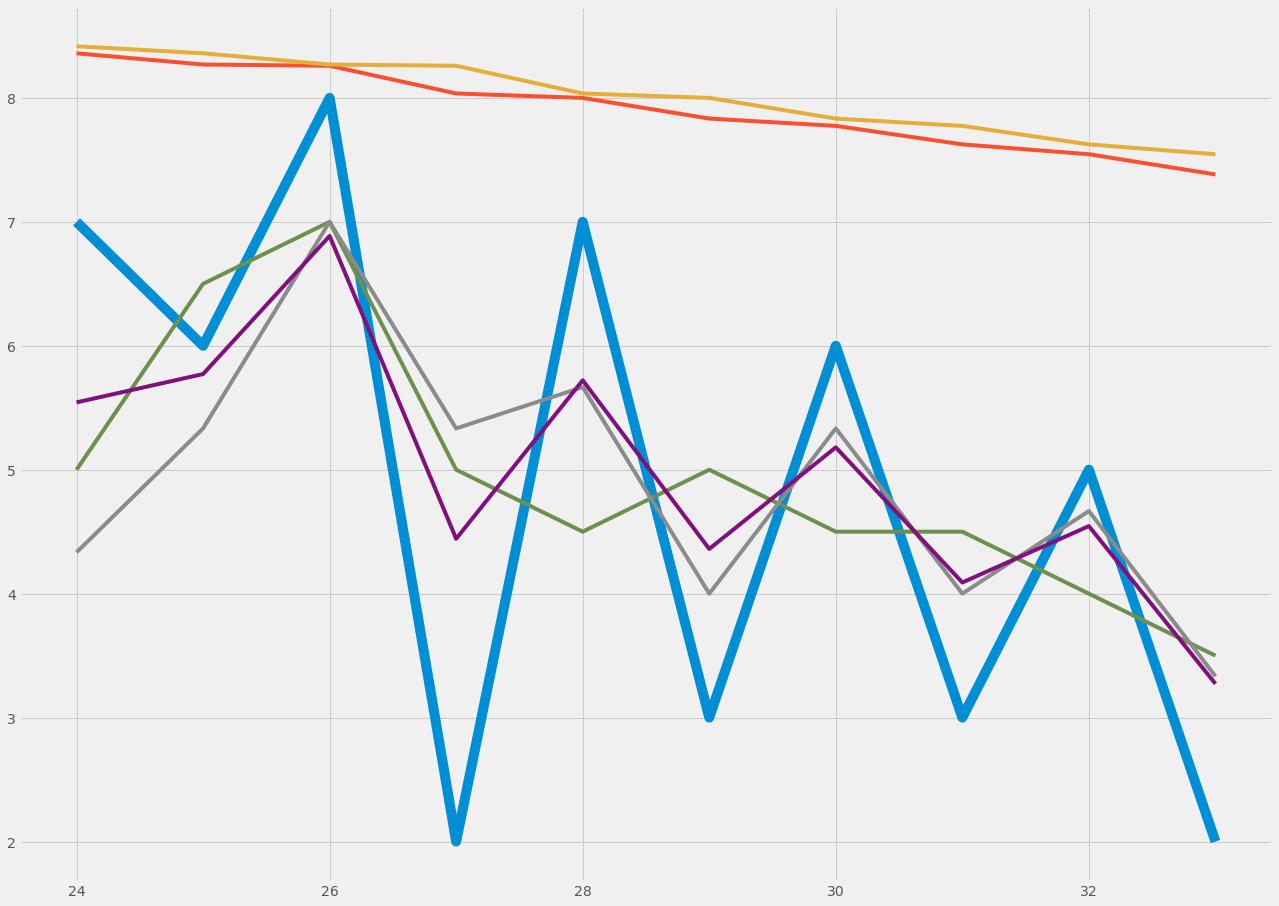

In [585]:
plt.figure(figsize=(20,15))

plt.plot(x.date_block_num, x.item_cnt_month, linewidth=10)
plt.plot(x.date_block_num, x.exp_mean_item_cnt_month)
#plt.plot(x.date_block_num, x.pps_item_cnt_month_lag_1)
plt.plot(x.date_block_num, x.pps_exp_mean_item_cnt_month_lag_1)
plt.plot(x.date_block_num, x.rw2_mean_item_cnt_month)
plt.plot(x.date_block_num, x.rw3_mean_item_cnt_month)
plt.plot(x.date_block_num, x.ewma)


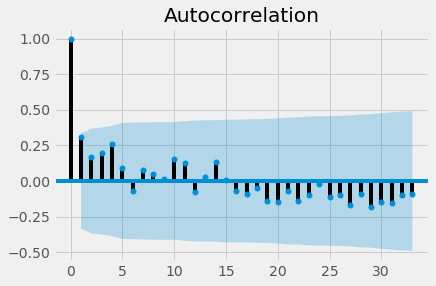

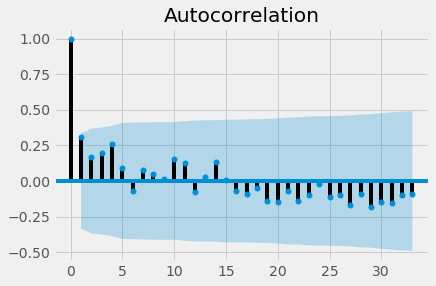

In [598]:
from statsmodels.graphics.tsaplots import plot_acf
#x = pd.DataFrame(train.groupby(['date_block_num']).agg({'item_cnt_month':'sum'}))['item_cnt_month']
x = train[(train.item_id == 2308) & (train.shop_id == 46)]['item_cnt_month']
plot_acf(x)

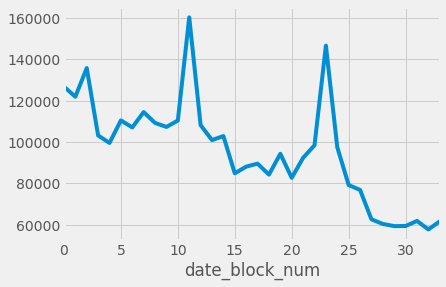

In [593]:
x.plot()

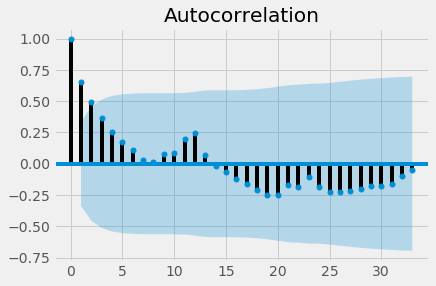

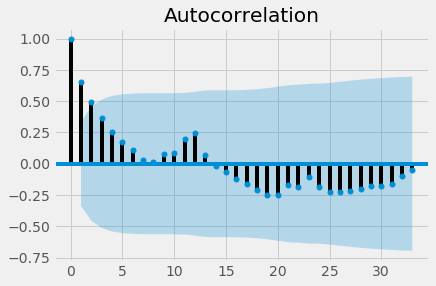

In [601]:
x = pd.DataFrame(train.groupby(['date_block_num']).agg({'item_cnt_month':'sum'}))['item_cnt_month']
plot_acf(x)

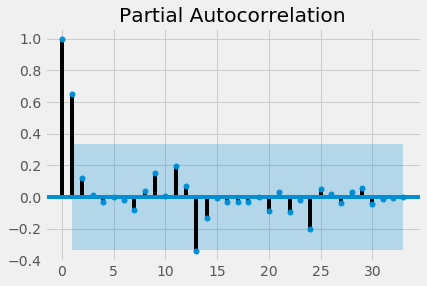

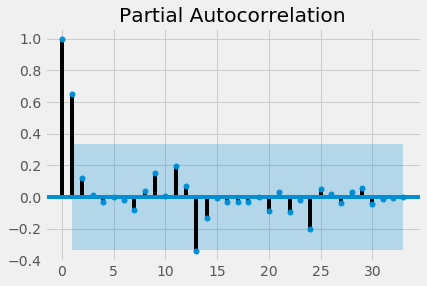

In [603]:
from statsmodels.graphics.tsaplots import plot_pacf
x = pd.DataFrame(train.groupby(['date_block_num']).agg({'item_cnt_month':'sum'}))['item_cnt_month']
plot_pacf(x)

In [604]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [605]:
import warnings
warnings.filterwarnings("ignore")

In [606]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [639]:
train = pd.read_csv("D:/Coursera/data/sales_train_v2.csv", parse_dates=[0], dayfirst=True, infer_datetime_format=True, index_col=False)
floats = [c for c in train if train[c].dtype == 'float64']
ints = [c for c in train if train[c].dtype == 'int64']
train[floats] = train[floats].astype(np.float32)
train[ints] = train[ints].astype(np.int32)
train['quarter'] = np.int8(pd.DatetimeIndex(train.date).quarter)
train['year'] = np.int32(pd.DatetimeIndex(train.date).year)
train['month'] = np.int8(pd.DatetimeIndex(train.date).month)
train['day'] = np.int8(pd.DatetimeIndex(train.date).day)
train['dayofweek'] = np.int8(pd.DatetimeIndex(train.date).dayofweek)
train['daysinmonth'] = np.int8(pd.DatetimeIndex(train.date).daysinmonth)

In [617]:
x = pd.DataFrame(train.groupby(['date']).agg({'item_cnt_day':'sum'}))['item_cnt_day']

In [618]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(x.values, p_values, d_values, q_values)

Best ARIMANone MSE=inf


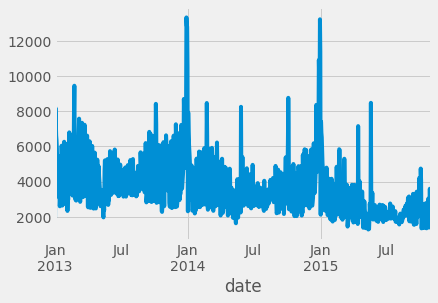

In [620]:
x.plot()

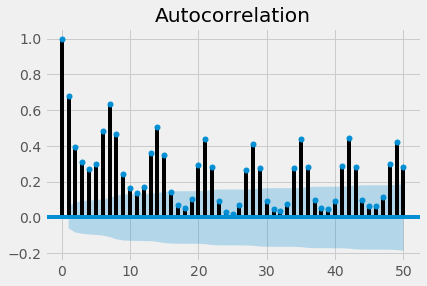

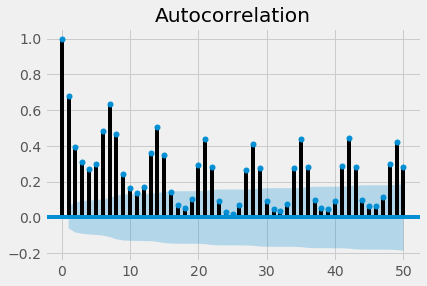

In [623]:
plot_acf(x, lags=50)

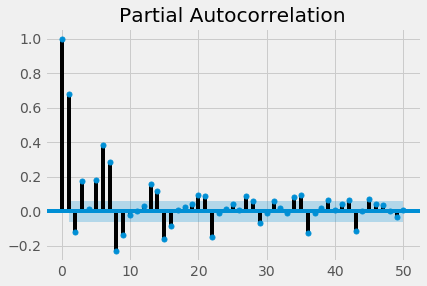

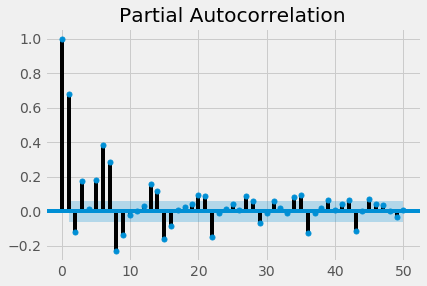

In [624]:
plot_pacf(x, lags=50)

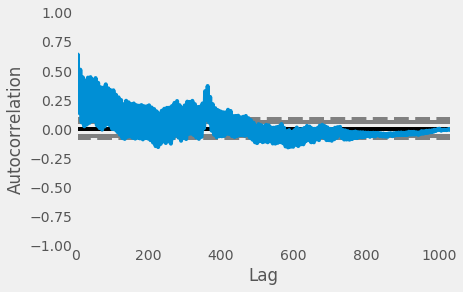

In [629]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(x)

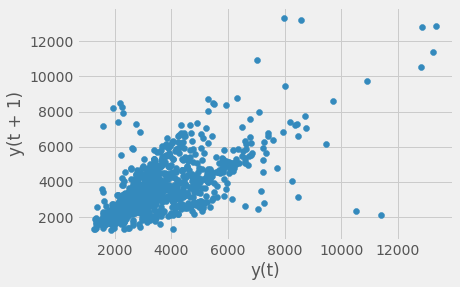

In [630]:
from pandas.tools.plotting import lag_plot
lag_plot(x)

In [640]:
train = train.groupby(['date_block_num','year','quarter','month','shop_id','item_id'], as_index=False).agg({'item_cnt_day':'sum'})
train.columns = ['date_block_num','year','quarter','month','shop_id','item_id','item_cnt_month']
train.index.name = 'ID'
train.item_cnt_month = np.clip(train.item_cnt_month, 0, 20)
train.date_block_num = np.int8(train.date_block_num)
train.year = np.int32(train.year)
train.quarter = np.int8(train.quarter)
train.month = np.int8(train.month)
train.shop_id = np.int8(train.shop_id)
train.item_id = np.int32(train.item_id)
train.item_cnt_month = np.float32(train.item_cnt_month)

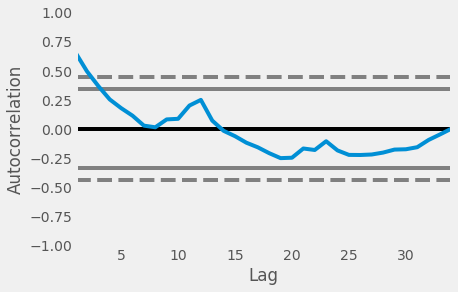

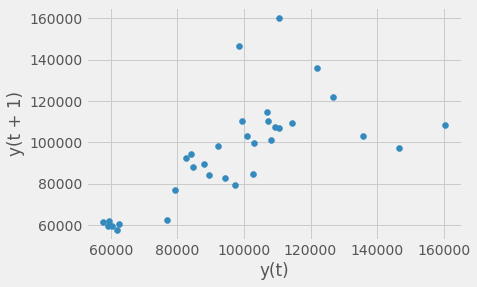

In [641]:
x = pd.DataFrame(train.groupby(['date_block_num']).agg({'item_cnt_month':'sum'}))['item_cnt_month']
autocorrelation_plot(x)
plt.show()
lag_plot(x)
plt.show()